In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
from astropy.stats import RipleysKEstimator

In [18]:
# Create a random distribution of points in 2-dimensional space
rng = np.random.default_rng()
# 100 points in a 2-dimensional space using a poisson distribution
# data = rng.poisson(lam=100, size=(100,2))
data2 = rng.random((1000, 2))


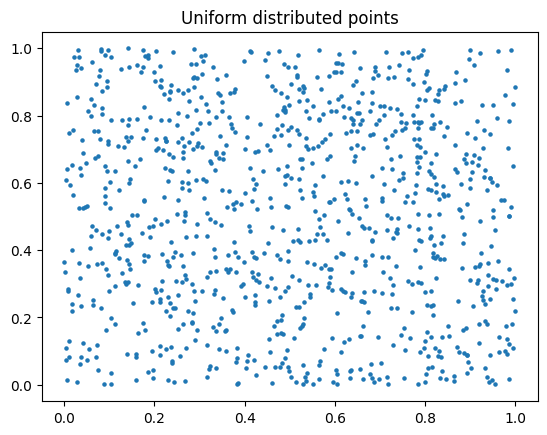

In [19]:
#show the points
plt.scatter(data2[:,0], data2[:,1], s=5)
plt.title('Uniform distributed points')
plt.show()

In [20]:
def distances(data):
    npts = np.shape(data)[0]
    distances = []
    for i in range(npts):
        for j in range(i+1, npts):
            distances.append(math.dist(data[i], data[j]))
    return distances

# calculate the ripleys K 
def ripleyK(area, data, radii):
    npts = np.shape(data)[0]
    K = np.zeros_like(radii)
    dist = distances(data)
    for i in range(len(radii)):
        K[i] = np.sum(dist < radii[i])
    K = area * 2 * K / (npts * (npts - 1))
    return K


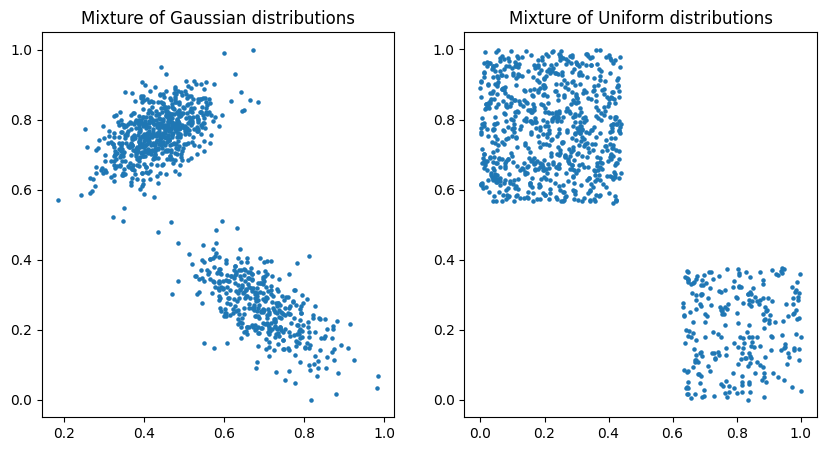

In [21]:
# Generate sample of mixture distribution

# Define the parameters for the gaussian distributions
mu1 = np.array([-0.5, 1.5])
mu2 = np.array([1, -1.5])
sigma1 = np.array([[0.2, 0.1], [0.1, 0.2]])
sigma2 = np.array([[0.3, -0.2], [-0.2, 0.3]])
# Define the mixing probability
p = 0.6

# Generate samples from the mixture distribution
n = 1000
samples = np.zeros((n, 2))
for i in range(n):
    if np.random.rand() < p:
        samples[i] = np.random.multivariate_normal(mu1, sigma1)
    else:
        samples[i] = np.random.multivariate_normal(mu2, sigma2)

# normalize the samples
samples_mix = (samples - samples.min()) / (samples.max() - samples.min())

# Uniform distribution
low1 = np.array([-0.8, 0.1])
high1 = np.array([-0.1, 0.8])
low2 = np.array([0.2, -0.8])
high2 = np.array([0.8, -0.2])
p = 0.75

n = 1000
samples = np.zeros((n, 2))
for i in range(n):
    if np.random.rand() < p:
        samples[i] = np.random.uniform(low1, high1)
    else:
        samples[i] = np.random.uniform(low2, high2)

# normalize the samples
samples_uni = (samples - samples.min()) / (samples.max() - samples.min())

# Plot the samples
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(samples_mix[:,0], samples_mix[:,1], s=5)
ax1.set_title('Mixture of Gaussian distributions')
ax2.scatter(samples_uni[:,0], samples_uni[:,1], s=5)
ax2.set_title('Mixture of Uniform distributions')
plt.savefig('mixture distribution and Uniform distribution.png')
plt.show()

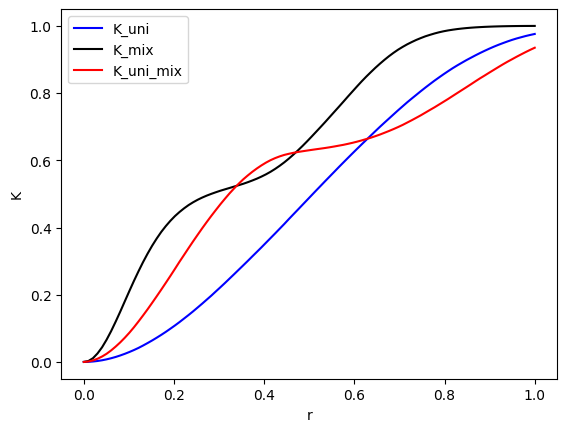

In [22]:
r = np.linspace(0, 1, 100)

kt_uni = ripleyK(1, data2, r)
Kt_mix = ripleyK(1, samples_mix, r)
kt_uni_mix = ripleyK(1, samples_uni, r)

plt.plot(r, kt_uni, color = 'blue', label='K_uni')
plt.plot(r, Kt_mix, color = 'black', label='K_mix')
plt.plot(r, kt_uni_mix, color = 'red', label='K_uni_mix')
plt.xlabel('r')
plt.ylabel('K')
plt.legend()
plt.savefig('Kt2D.png')
plt.show()